In [23]:
import pandas as pd
ratings = pd.read_csv ('/Users/mac/Desktop/2see:learn/analytics/Netology/Netology_python/Pandas/11/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [24]:
def rating_scale (row):
    if row.rating <= 2 :
        return 'низкий рейтинг'
    elif row.rating <= 4 :
        return 'средний рейтинг'
    elif row.rating >= 4.5 :
        return 'высокий рейтинг'
    
ratings['rating_scale'] = ratings.apply(rating_scale, axis=1)
ratings.head()

,userId,movieId,rating,timestamp,rating_scale
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг


In [25]:
keywords = pd.read_csv('/Users/mac/Desktop/2see:learn/analytics/Netology/Netology_python/Pandas/11/ml-latest-small/keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [31]:
# функция по запросам, включающим города и классификацией по регионам
def geo_class(row):
    if 'москва' in row['keyword'] or 'тула' in row['keyword'] or 'ярославль' in row['keyword']:
        return 'Центр'
    elif 'петербург' in row['keyword'] or 'псков' in row['keyword'] or 'псков' in row['keyword']:
        return 'Северо-Запад'
    elif 'владивосток' in row['keyword'] or 'сахалин' in row['keyword'] or 'хабаровск' in row['keyword']:
        return 'Дальний Восток'
    else:
        return 'undefined'
    
# применяем функцию к датасету и добавляем столбец 'region' 
keywords['region'] = keywords.apply(geo_class, axis=1)

# считаем распределение между регионами
keywords['region'].value_counts()


undefined         99281
Центр               387
Северо-Запад        238
Дальний Восток       94
Name: region, dtype: int64

In [33]:
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


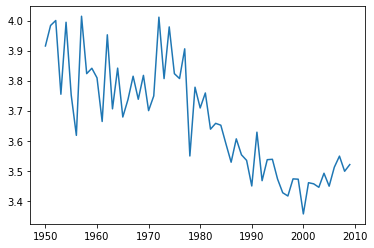

In [45]:
# читаем файл с фильмами 
movies = pd.read_csv ('/Users/mac/Desktop/2see:learn/analytics/Netology/Netology_python/Pandas/11/ml-latest-small/movies.csv')
movies.head()

# функция определения года 
def production_year(film):
    years = range(1950,2010)
    val = [yr for yr in years if str(yr) in film['title']]
    if val:
        return val[0]
    else:
        return 1900  
# добавляем года в новый столбец 'years'
movies['years'] = movies.apply(production_year, axis=1)
movies.head()

# объединим две датафрейма, рассчитаем средний рейтинг
joined = movies.merge(ratings, on='movieId', how='left')
movies_ratings = joined.groupby('years').rating.mean().reset_index()
movies_ratings.sort_values('rating', ascending = False)

movies_ratings_excl1900 = movies_ratings[movies_ratings['years']!=1900] 
import matplotlib.pyplot as plt
plt.plot(movies_ratings_excl1900['years'], movies_ratings_excl1900['rating'])
